#RNN

In [2]:
import torch
import numpy as np

In [3]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

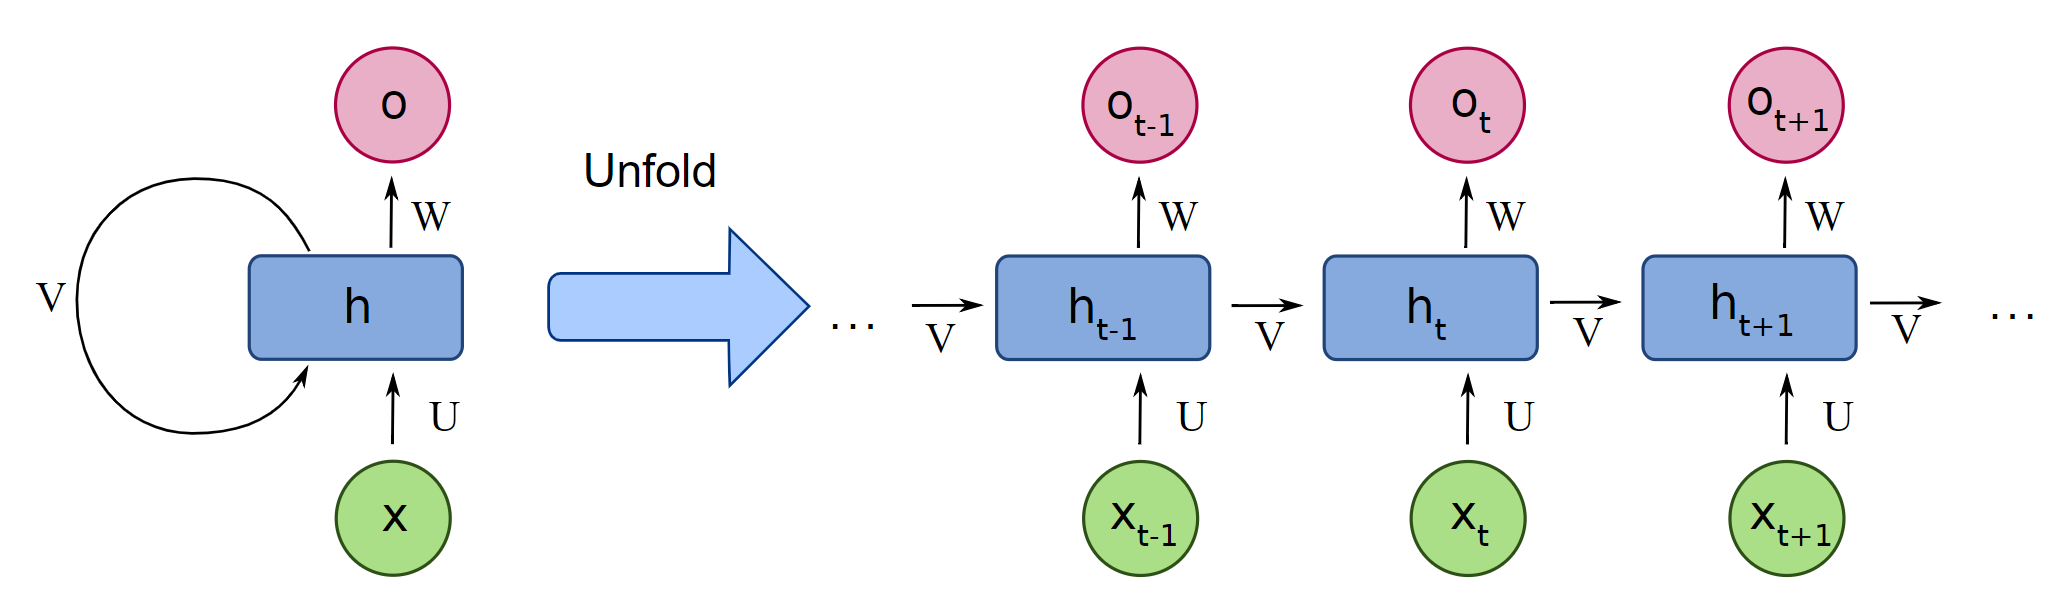

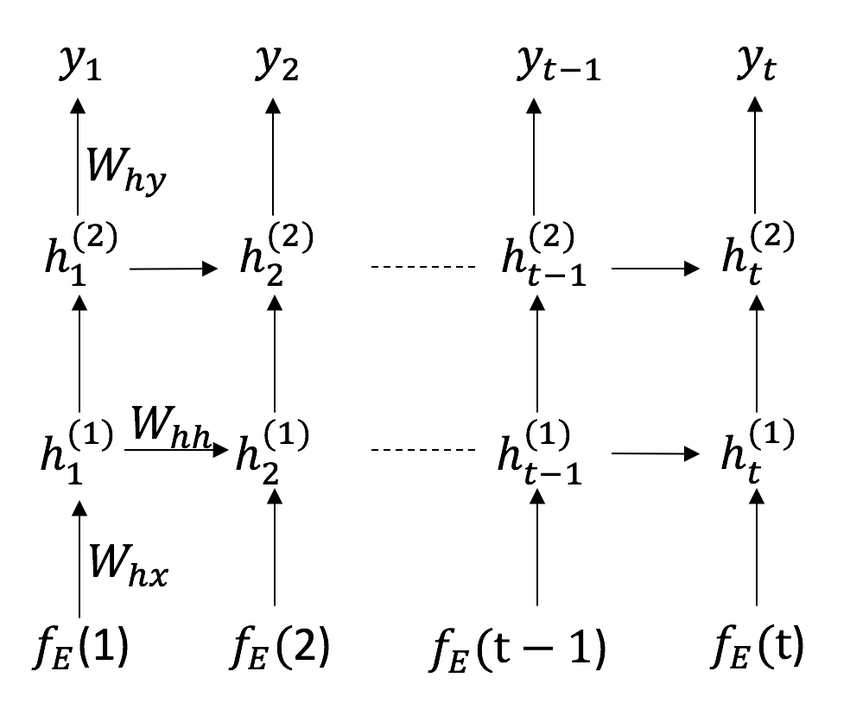

In [4]:
# declare dimension
input_size = 4
hidden_size = 2

In [5]:
# singleton example
# shape : (1, 1, 4)
# input_data_np = np.array([[[1, 0, 0, 0]]])

# sequential example
# shape : (3, 5, 4)
# (batch size, seq length, input_size)
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
input_data_np = np.array([[h, e, l, l, o], 
                          [e, o, l, l, l], 
                          [l, l, e, e, l]], dtype=np.float32)  # (3, 5, 4)

In [6]:
# transform as torch tensor
input_data = torch.Tensor(input_data_np)

In [7]:
# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  # 처음에 batch_size or seq_length

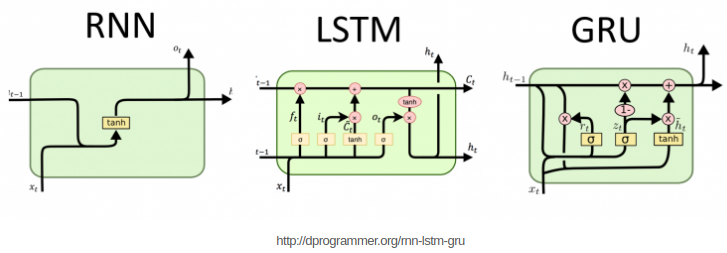

In [8]:
# check output
outputs, _status = rnn(input_data)
# inputs: input, h_0 = 0 (num_layers*num_directions, batch, hidden_size)
print(outputs)
print(outputs.size())
print()
# shape : (3, 5, 2)
# (batch size, seq length, hidden_size)

print(_status)
print(_status.size())

tensor([[[-0.7497, -0.6135],
         [-0.5753, -0.0070],
         [-0.9077, -0.3205],
         [-0.9141, -0.2142],
         [-0.8996,  0.3307]],

        [[-0.5282, -0.2473],
         [-0.9052,  0.2597],
         [-0.8944, -0.2902],
         [-0.9133, -0.2209],
         [-0.9109, -0.2263]],

        [[-0.9136, -0.4269],
         [-0.9173, -0.1989],
         [-0.5134, -0.0288],
         [-0.5086, -0.1379],
         [-0.9126, -0.3170]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 2])

tensor([[[-0.8996,  0.3307],
         [-0.9109, -0.2263],
         [-0.9126, -0.3170]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 2])


In [9]:
[(name, param.shape) for name, param in rnn.named_parameters()]

[('weight_ih_l0', torch.Size([2, 4])),
 ('weight_hh_l0', torch.Size([2, 2])),
 ('bias_ih_l0', torch.Size([2])),
 ('bias_hh_l0', torch.Size([2]))]

In [11]:
lstm = torch.nn.LSTM(input_size, hidden_size, batch_first=True)
outputs, _status = lstm(input_data)
print(outputs)
print(outputs.size())
print()

print(_status[0])
print(_status[0].shape)

tensor([[[ 0.0339, -0.0514],
         [ 0.0782,  0.0703],
         [ 0.0997,  0.1513],
         [ 0.0842,  0.1630],
         [ 0.0020,  0.2119]],

        [[ 0.0554,  0.1055],
         [ 0.0041,  0.2296],
         [-0.0039,  0.2207],
         [-0.0114,  0.2099],
         [-0.0162,  0.2045]],

        [[ 0.0191,  0.0915],
         [ 0.0239,  0.1391],
         [ 0.0530,  0.1443],
         [ 0.0769,  0.1727],
         [ 0.0839,  0.2559]]], grad_fn=<TransposeBackward0>)
torch.Size([3, 5, 2])

tensor([[[ 0.0020,  0.2119],
         [-0.0162,  0.2045],
         [ 0.0839,  0.2559]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 2])


In [12]:
[(name, param.shape) for name, param in lstm.named_parameters()]

[('weight_ih_l0', torch.Size([8, 4])),
 ('weight_hh_l0', torch.Size([8, 2])),
 ('bias_ih_l0', torch.Size([8])),
 ('bias_hh_l0', torch.Size([8]))]

In [ ]:
gru = torch.nn.GRU(input_size, hidden_size, batch_first=True)
outputs, _status = gru(input_data)
print(outputs)
print(outputs.size())
print()

print(_status)
print(_status.size())

tensor([[[ 0.3044,  0.1995],
         [ 0.3212,  0.2732],
         [-0.0498, -0.2167],
         [-0.2549, -0.3426],
         [-0.2249, -0.3019]],

        [[ 0.2339,  0.1562],
         [ 0.0143, -0.1343],
         [-0.2198, -0.3237],
         [-0.3289, -0.3832],
         [-0.3745, -0.4091]],

        [[-0.2014, -0.3100],
         [-0.3206, -0.3787],
         [ 0.1032, -0.0161],
         [ 0.2457,  0.1677],
         [-0.0924, -0.2463]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 2])

tensor([[[-0.2249, -0.3019],
         [-0.3745, -0.4091],
         [-0.0924, -0.2463]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 2])


## Exercise. Apply RNN to image classification.

In [13]:
import torchvision
import torchvision.transforms as transforms

In [14]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./mnist', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./mnist', train=False, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [15]:
from multiprocessing import cpu_count

In [16]:
num_workers = int(cpu_count() / 2)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [19]:
class ImageRNN(torch.nn.Module):
    def __init__(self, batch_size, seq_length, input_size, hidden_size, num_classes, device):
        super().__init__()
        self.batch_size = batch_size
        self.seq_length = seq_length
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes

        # make rnn
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity='tanh')
        # make fully-connected
        self.fc = torch.nn.Linear(seq_length*hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, self.seq_length, self.input_size) # (-1, 28, 28)
        x, hidden = self.rnn(x)
        x = x.reshape(-1, (self.seq_length * self.hidden_size))
        out = self.fc(x)
        return out

In [20]:
# parameters
seq_length = 28
input_size = 28  # w, h 
hidden_size = 30
num_classes = 10
epochs = 10

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
import torch.optim as optim

In [24]:
from torch import nn

In [25]:
model = ImageRNN(batch_size, seq_length, input_size, hidden_size, num_classes, device).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
# %%time

for epoch in range(epochs):
    # Train
    model.train()
    
    train_loss = 0
    train_correct = 0
    
    for x, y in trainloader:
        optimizer.zero_grad()

        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
                
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        train_correct += predicted.eq(y).sum().item()
        
    train_loss = train_loss / len(trainloader)
    train_acc = train_correct / len(trainset)
        
    print('[%2d] TRAIN loss: %.3f, acc: %.3f' % (epoch+1, train_loss, train_acc))

[ 1] TRAIN loss: 0.375, acc: 0.890
[ 2] TRAIN loss: 0.179, acc: 0.947
[ 3] TRAIN loss: 0.135, acc: 0.961
[ 4] TRAIN loss: 0.109, acc: 0.968
[ 5] TRAIN loss: 0.095, acc: 0.972
[ 6] TRAIN loss: 0.086, acc: 0.975
[ 7] TRAIN loss: 0.077, acc: 0.977
[ 8] TRAIN loss: 0.072, acc: 0.978
[ 9] TRAIN loss: 0.066, acc: 0.980
[10] TRAIN loss: 0.063, acc: 0.981


In [27]:
# Test
model.eval()

test_loss = 0
test_correct = 0
test_preds = []

with torch.no_grad():
    for i, (x, y) in enumerate(testloader):
        x = x.view(-1, 28, 28)
        
        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
        
        test_loss += loss.item()
        _, predicted = outputs.max(1)
        test_correct += predicted.eq(y).sum().item()
        
        if i == 0:
            test_preds = predicted
        else:
            test_preds = torch.cat((test_preds, predicted), dim=0)
            
test_preds = test_preds.cpu()

print('TEST loss: %.4f, acc: %.4f' % (test_loss/len(testloader), test_correct/len(testset)))

TEST loss: 0.0755, acc: 0.9773


In [29]:
print(test_preds[:20])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])


In [30]:
print(testset.targets[:20])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])
